Understanding context modifiers: **stimulus_CM**
================================================

This small example shows a way to use the built-in [context modifiers](../../usersguide/optimization.rst#context-modifier)
:`stimulus_CM`.

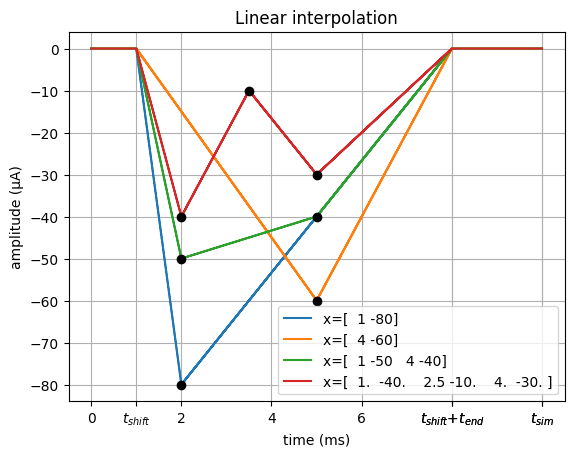

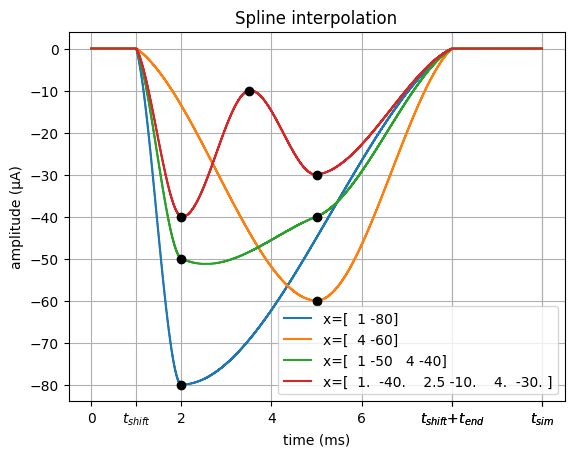

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import nrv

# Generate a dummy static context
t_sim=10
l_ax = 10000
ax = nrv.myelinated(y=0, z=0, L=l_ax)
E1 = nrv.point_source_electrode(x=l_ax/2,y=0, z=100)
dummy_stim = nrv.stimulus()

extra_stim = nrv.stimulation("epineurium")
extra_stim.add_electrode(E1, dummy_stim)
ax.attach_extracellular_stimulation(extra_stim)
static_context = ax.save(extracel_context=True)

# Sets of tunning parameters
X1 = np.array([1, -80])
X2 = np.array([4, -60])
X3 = np.array([1, -50, 4, -40])
X4 = np.array([1, -40, 2.5, -10, 4, -30])

X = [X1, X2, X3, X4]

# context modifiers parameters
dt = 0.005
t_shift = 1
amp_start = 0
amp_stop = 0
fixed_order = False
t_end = t_sim-3

## Spline interpolation
# Generate the context modifiers
kwrgs_interp = {
    "dt": dt,
    "t_shift": t_shift,
    "amp_start": amp_start,
    "amp_stop": amp_stop,
    "intertype": "spline",
    "fixed_order": fixed_order,
    "t_end": t_end,
    }
test_stim_CM = nrv.stimulus_CM(interpolator=nrv.interpolate_Npts, intrep_kwargs=kwrgs_interp, t_sim=t_sim)

# Plot stimuli for every points
fig1, ax1 = plt.subplots()
ax1.set_title("Spline interpolation")
for i, x in enumerate(X):
    # we get the stimulus of the axon generated from the context modifier
    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax

    plt.figure(1)
    stim.plot(ax1, label=f"x={x}")
    ax1.plot(t_shift+x[::2], x[1::2], 'ok')

ax1.grid()
ax1.legend()
ax1.set_xlabel('time (ms)')
ax1.set_ylabel('amplitude (µA)')
ax1.set_xticks(
    [0, 2, 4, 6, 8, 10, t_shift, t_shift+t_end, t_sim],
    labels=["0", "2", "4", "6", "8", "10", "$t_{shift}$", "$t_{shift}$+$t_{end}$", "$t_{sim}$"]
)


## Linear
# Generate the context modifiers

kwrgs_interp["intertype"] = "linear"

# Plot stimuli for every points
fig2, ax2 = plt.subplots()
ax2.set_title("Linear interpolation")
for i, x in enumerate(X):
    # for this example only the stimulus of the axon
    # generated from the context modifier is required

    ax = test_stim_CM(x, static_context)
    stim = ax.extra_stim.stimuli[0]
    del ax

    plt.figure(1)
    stim.plot(ax2, label=f"x={x}")
    ax2.plot(t_shift+x[::2], x[1::2], 'ok')

ax2.grid()
ax2.legend()
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('amplitude (µA)')
ax2.set_xticks([0, 2, 4, 6, 8, 10, t_shift, t_shift+t_end, t_sim], labels=["0", "2", "4", "6", "8", "10", "$t_{shift}$", "$t_{shift}$+$t_{end}$", "$t_{sim}$"])